# Exploration and Visualization of Secondary Data

In addition to the spectral data and targets, the data includes some secondary measures related to climate at the location from which each soil sample was collected. While we won't use these data as predictors in our models, they can provide some context about the spread of climates we're sampling.

Here are the descriptions of these data from the Kaggle website:

**BSA:** average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)

**CTI:** compound topographic index calculated from Shuttle Radar Topography Mission elevation data
 * From wikipedia: "The topographic wetness index (TWI), also known as the compound topographic index (CTI), is a steady state wetness index. It is commonly used to quantify topographic control on hydrological processes.[1] The index is a function of both the slope and the upstream contributing area per unit width orthogonal to the flow direction. The index was designed for hillslope catenas. Accumulation numbers in flat areas will be very large, so TWI will not be a relevant variable. The index is highly correlated with several soil attributes such as horizon depth, silt percentage, organic matter content, and phosphorus.[2]"

**ELEV:** Shuttle Radar Topography Mission elevation data

**EVI:** average long-term Enhanced Vegetation Index from MODIS satellite images.

**LST:** average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)

**Ref:** average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, Ref7 = mid-infrared)

**Reli:** topographic Relief calculated from Shuttle Radar Topography mission elevation data

**TMAP & TMFI:** average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np

import seaborn as sns

%matplotlib inline

from scripts.load_data import *

In [24]:
sns.set_context("talk",font_scale=2)
sns.set_style("white")


#### Load the data and view the first few columns

In [3]:
[spectral_data,targets]=load_training_spectra()
[satellite,targets]=load_training_satellite_data()


In [4]:
satellite.head()

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
0,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
1,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
2,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
3,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
4,-0.688406,-0.763636,-0.884658,-0.583576,1.276837,1.191691,-1.206971,0.011420,-0.906182,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843


#### List some descriptive stats about the variables

In [4]:
satellite.describe()

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,-0.572226,-0.623242,-0.691976,-0.213203,0.533953,0.698859,-0.413636,-0.092569,-0.698528,-0.506340,-0.661642,-0.638464,0.276786,0.563194,0.746303
std,0.235748,0.239737,0.281652,0.661576,1.396132,0.683280,0.686773,0.861165,0.272107,0.329785,0.365572,0.326460,1.074667,0.649622,0.825242
min,-1.007246,-0.972727,-1.175812,-0.945472,-1.326726,-0.881924,-1.906958,-2.720276,-1.127273,-1.642857,-1.265010,-1.115423,-0.639823,-0.670742,-0.862741
25%,-0.739130,-0.781818,-0.895857,-0.548063,-0.812249,0.199708,-0.906601,-0.622874,-0.900364,-0.753247,-0.917184,-0.881048,-0.452939,0.190708,0.056843
50%,-0.608696,-0.681818,-0.761478,-0.344714,0.867038,0.659621,-0.476813,-0.019511,-0.754182,-0.531540,-0.753623,-0.740423,-0.130139,0.316667,0.729111
75%,-0.463768,-0.563636,-0.604703,-0.104917,1.292428,1.129738,0.080083,0.631670,-0.594909,-0.269944,-0.445135,-0.432460,0.532450,0.955935,1.414215
max,0.217391,0.200000,0.223964,3.596526,4.891537,2.645044,1.320112,1.519218,0.285818,0.335807,0.366460,0.290323,5.612300,2.161892,2.976315


### Look at pairwise, marginal distributions for subset of secondary data columns

From these plots, we can see that some of the variables have interesting distributions - in particular, elevation and rainfall both have bimodal distributions, suggesting that the data might come from distinct types of regions or climates. We can also see that many of the measures are correlated 

In [41]:
climate=["ELEV","EVI","LSTD","LSTN","TMAP","TMFI","CTI"]
satt_measures=["BSAN", "BSAS", "BSAV", "CTI", "REF1","REF2", "REF3", "REF7", "RELI"]

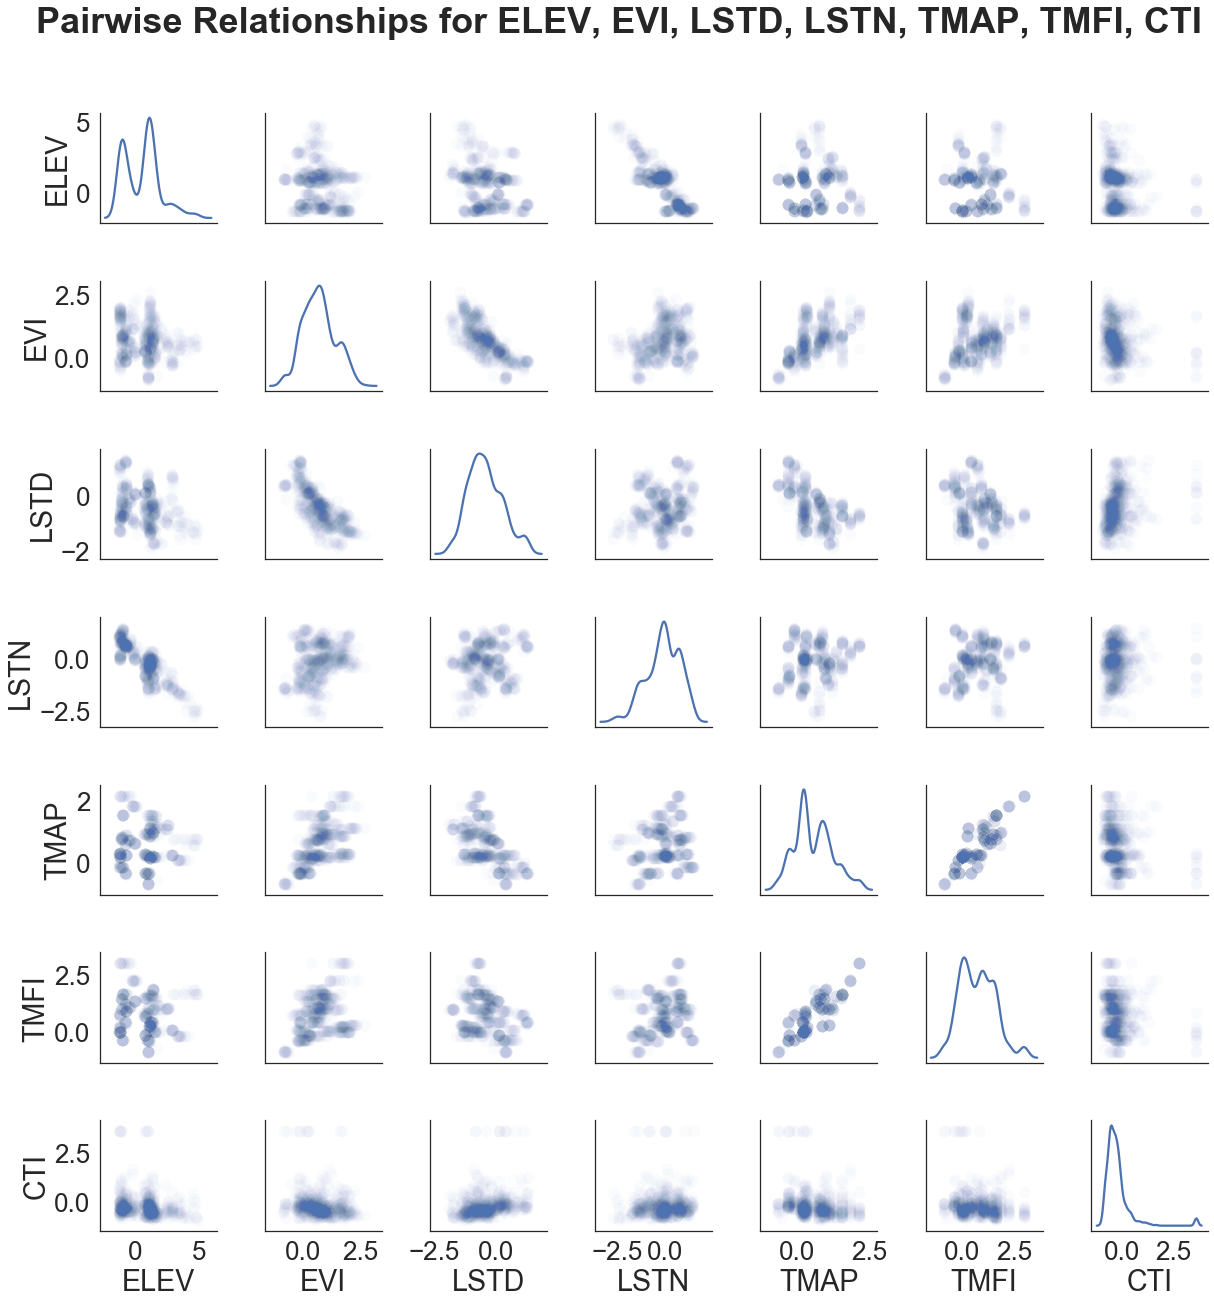

In [42]:
sns.pairplot(data=satellite,
                vars=climate,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(climate),
            fontsize=36,fontweight='bold',y=1.05
            );

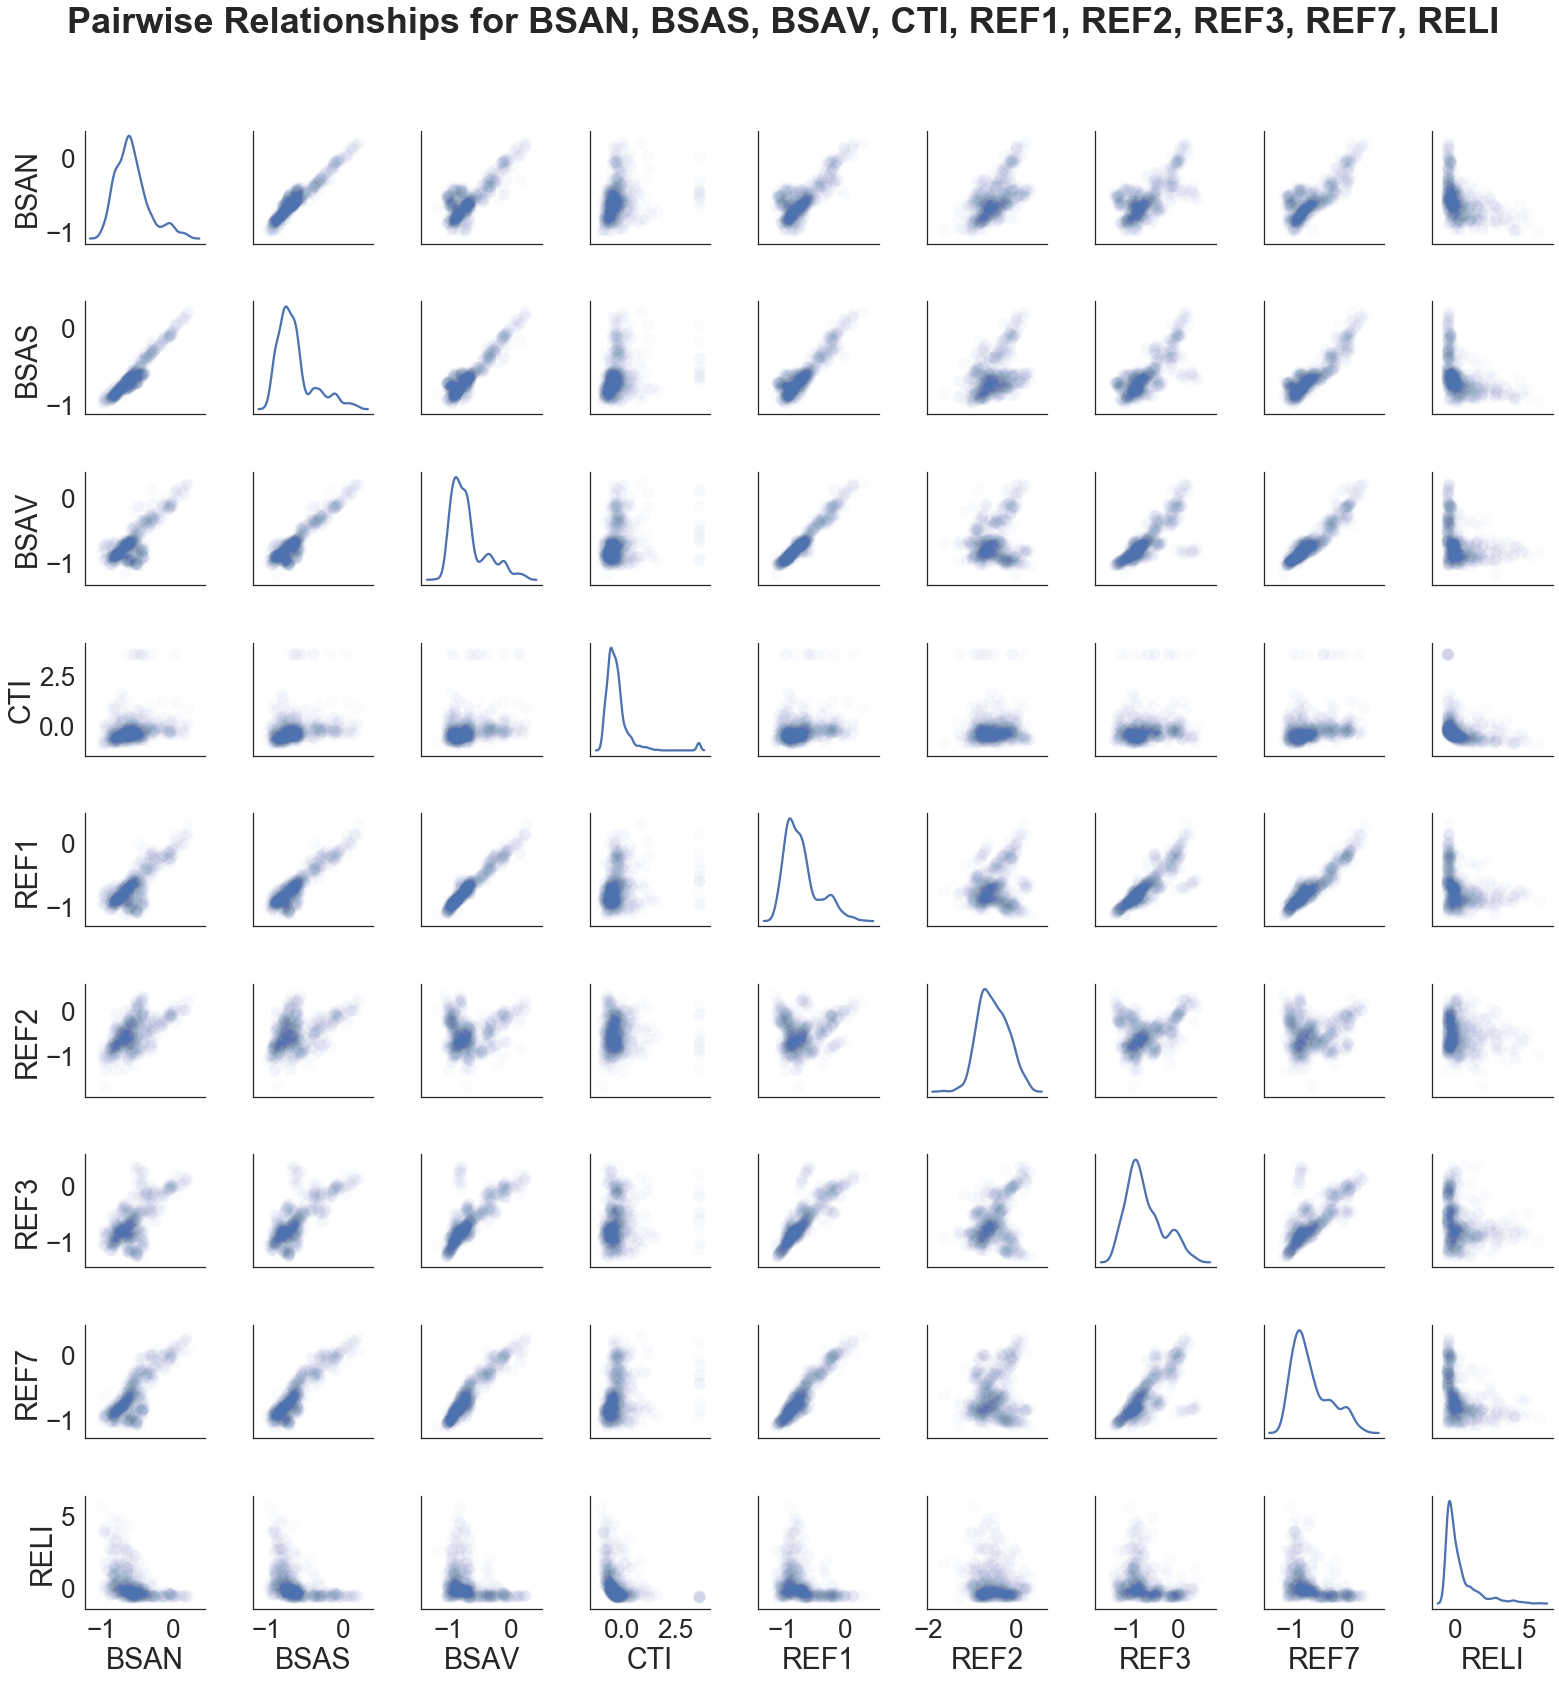

In [43]:
sns.pairplot(data=satellite,
                vars=satt_measures,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(satt_measures),
            fontsize=36,fontweight='bold',y=1.05
            );

### Since many of the satellite measures are highly correlated, let's do some dimensionality reduction to see if we can split up the data into clusters

We'll use PCA for this - for more information, check out the dimensionality reduction notebook (link)

In [11]:
import sklearn.decomposition

In [44]:
secondary=satellite.columns
sat=satellite[secondary].as_matrix();
PCA=sklearn.decomposition.PCA()
PCA.fit(sat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

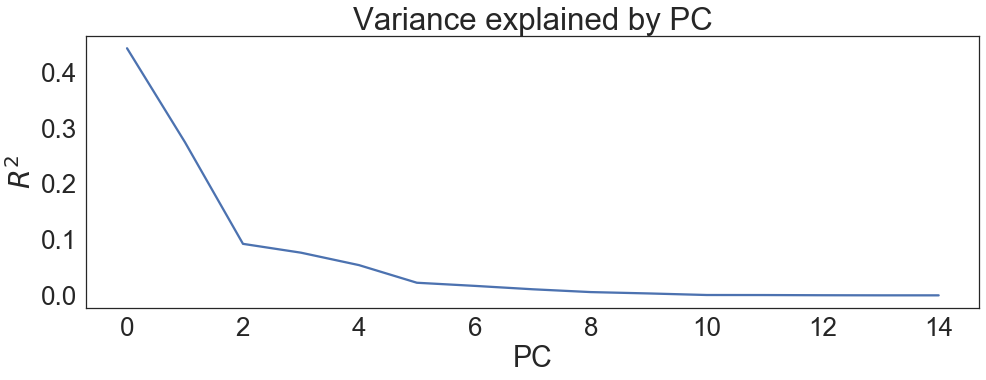

In [48]:
plt.figure(figsize=(16,5))
var_exp=PCA.explained_variance_ratio_
plt.plot(var_exp)
plt.xlabel("PC")
plt.ylabel(r"$R^2$")
plt.title("Variance explained by PC")

### The first two PCs explain 90% of the variance

Let's take a look at their loadings on the variables to gain some intuition about which variables best describe the spread of our data.

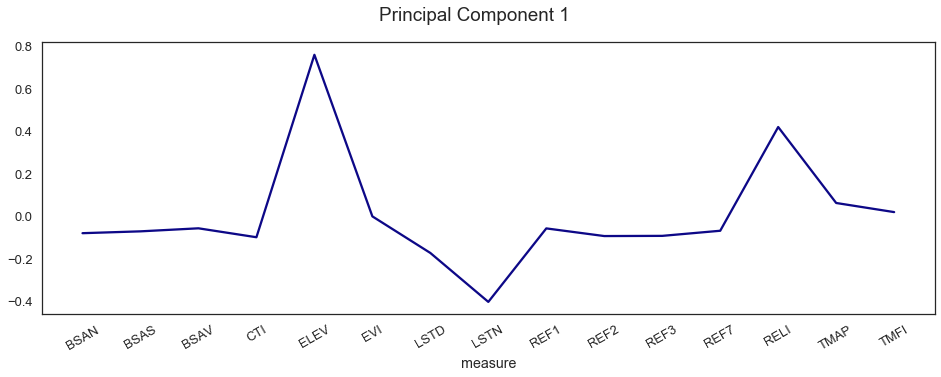

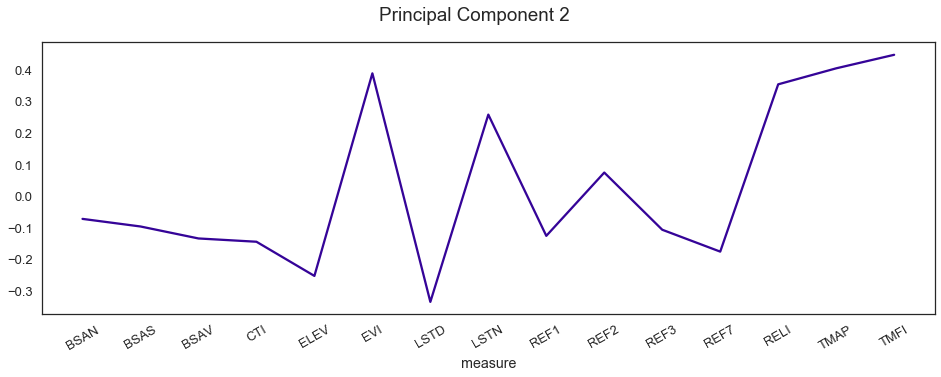

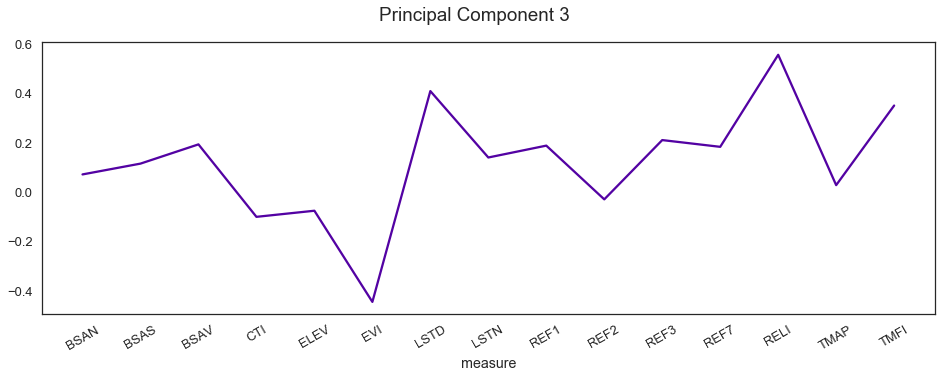

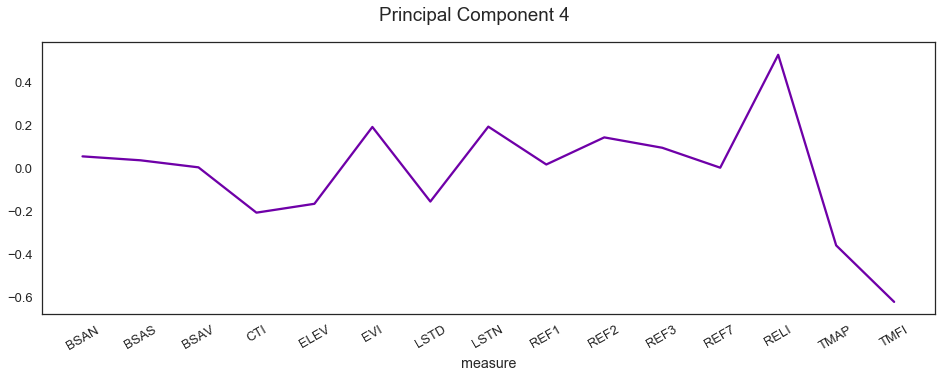

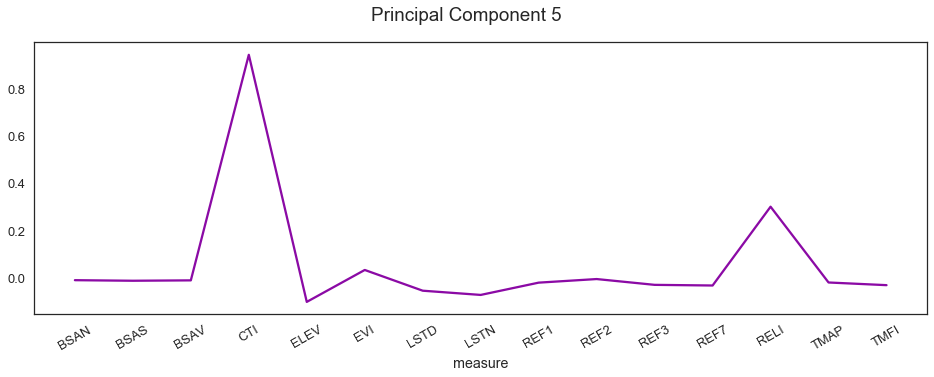

In [49]:
colors = plt.cm.plasma(np.linspace(0,1,len(PCA.components_)))
sns.set_context("talk",font_scale=1)
for c in range(5):#len(PCA.components_)):
    plt.figure(figsize=(16,5))
    plt.plot(PCA.components_[c,:],color=colors[c])
    plt.xlabel("measure")
    plt.suptitle("Principal Component "+ str(c+1))
    plt.xticks(range(15),secondary,fontsize="small",rotation=30)


#plt.legend(range(15))

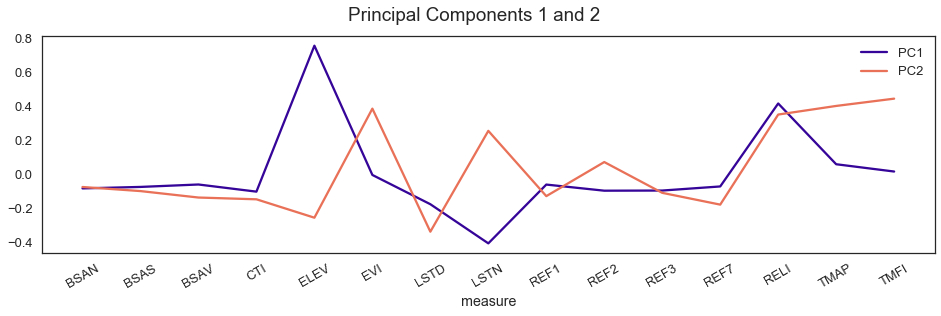

In [17]:
plt.figure(figsize=(16,4))
plt.plot(PCA.components_[0,:],color=colors[1])
plt.plot(PCA.components_[1,:],color=colors[9])
plt.xlabel("measure")
plt.suptitle("Principal Components 1 and 2")
plt.xticks(range(15),secondary,fontsize="small",rotation=30)


plt.legend(["PC1","PC2"])

### look at samples projected into space defined by 1st 2 PCs

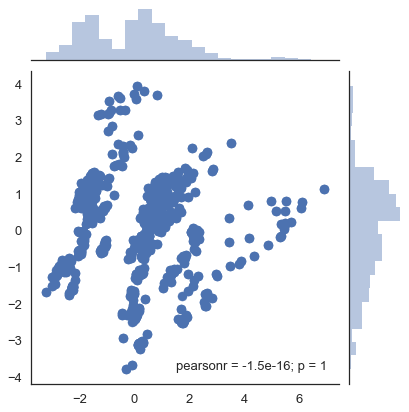

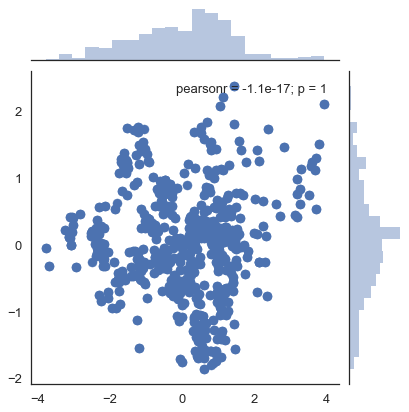

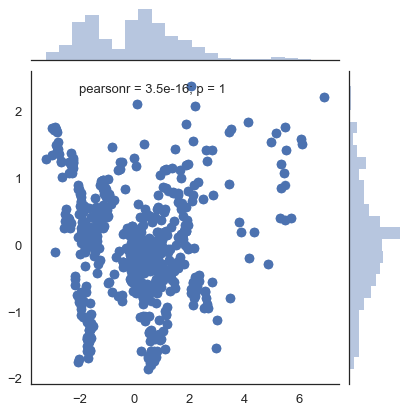

In [53]:
transformed_X=PCA.transform(sat)
#sns.pairplot(transformed_X[:,0:2])

sns.jointplot(transformed_X[:,0],transformed_X[:,1])

sns.jointplot(transformed_X[:,1],transformed_X[:,2])
sns.jointplot(transformed_X[:,0],transformed_X[:,2])

Since ELEV, EVI, and LSTN have highest loadings in 1st PC, lets look at the pairwise distributions of just these variables:

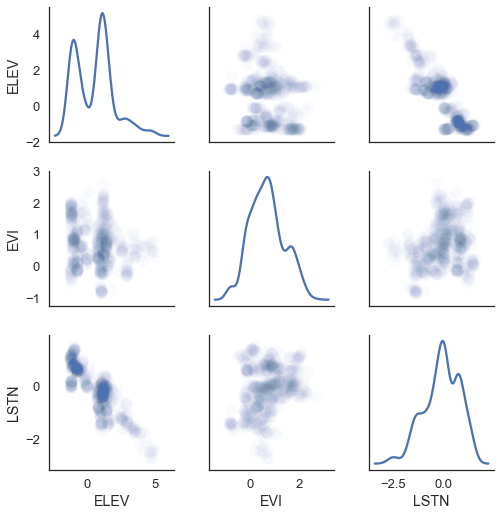

In [51]:
sns.pairplot(data=satellite,
            vars=["ELEV","EVI","LSTN"],
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde')

## How much does climate (rainfall, temperature, elevation, etc.) affect the performance of our models?

One thing we don't know about each data sample is the actual location from which it was collected. We'd like to build models that generalize well to soil all over Africa, but we have fairly small dataset, and we don't know how representative it is of all of the various soil types througout the continent. To get a sense of generalizability without knowing the spread of locations, let's split up the data based on climate variables to create train and test sets.

#### Separate the data into test and training components based on 1st PC 

We'll split into two groups, setting threshold as PC1 loading 0

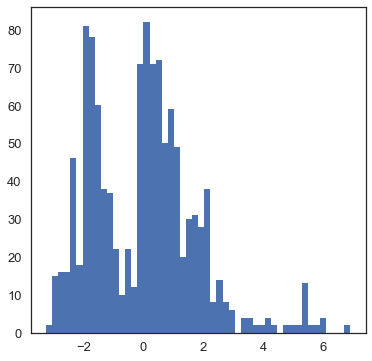

In [54]:
plt.figure(figsize=(6,6))
plt.hist(transformed_X[:,0],50);

In [61]:
group1_inds=transformed_X[:,0]<0
group2_inds=transformed_X[:,0]>=0

group1_X=spectral_data.loc[group1_inds]
group1_y=targets.loc[group1_inds]

group2_X=spectral_data.loc[group2_inds]
group2_y=targets.loc[group2_inds]


### We'll train a linear regression model on one split and test on the other

We'll first reduce the dimensionality of the spectral data using PCA (see the end of this notebook for how we determined how many PCs to keep)

For more info on linear regression, dimensionality reduction and cross-validation, please see these notebooks: (links)

In [63]:
model=sklearn.decomposition.PCA(n_components=20)
model.fit(X_train,y_train)
transformed_X_train = model.transform(group1_X)
transformed_X_test =  model.transform(group2_X)

lr = sklearn.linear_model.LinearRegression()
X_train=group2_X
y_train=group2_y

X_test=group1_X
y_test=group1_y

lr.fit(transformed_X_train,group1_y)
train_score = lr.score(transformed_X_train,group1_y)
test_score = lr.score(transformed_X_test,group2_y)

print(test_score)
y_train_predict=lr.predict(transformed_X_train)
y_test_predict=lr.predict(transformed_X_test)


0.483081244277


### As we can see from the $R^2$ value, the linear model performs ok when trained on one PC-loading-based split and tested on the other.



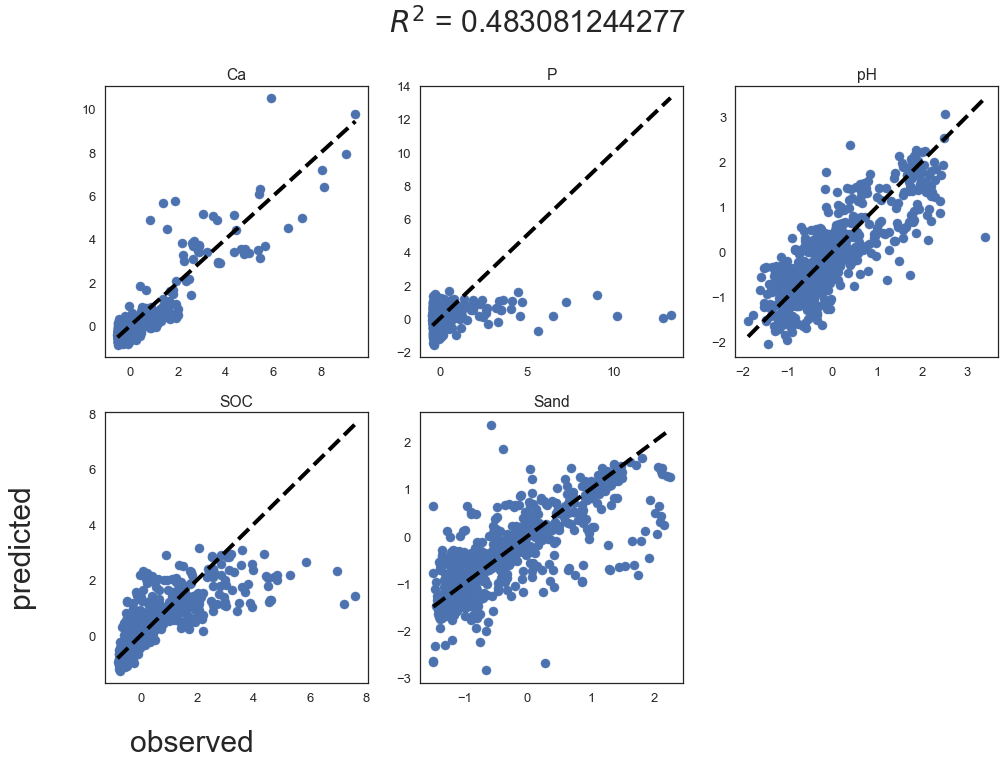

In [65]:
y_test_plot=group2_y.as_matrix()
f, ax = plt.subplots(2, 3,figsize=(16,11))
ax=ax.ravel()
targs=targets.columns;

for targ in range(len(targs)):
    ax[targ].scatter(y_test_plot[:,targ],y_test_predict[:,targ])
    ax[targ].plot([y_test_plot[:,targ].min(), y_test_plot[:,targ].max()],
             [y_test_plot[:,targ].min(), y_test_plot[:,targ].max()], 'k--', lw=4)
    #ax[targ].xlabel("observed")
    #ax[targ].ylabel("predicted")
    ax[targ].set_title(targs[targ])

    
f.text(0.2, 0.04, 'observed', ha='center',fontsize=30)
f.text(0.04, 0.3, 'predicted', va='center', rotation='vertical',fontsize=30)
f.delaxes(ax[5])
f.suptitle("$R^2$ = " + str(test_score),fontsize=30)


### Let' see what happens when we split the data based on elevation, rainfall, and night temperature

First, we'll make a pipeline of functions for splitting data by features and building/testing linear regression

In [79]:
def split_data(spectral_data,targets,satellite,split_var,split_var_value):
    group1_inds=satellite[split_var]<split_var_value
    group2_inds=satellite[split_var]>=split_var_value
    group1_X=spectral_data.loc[group1_inds]
    group1_y=targets.loc[group1_inds]
    group2_X=spectral_data.loc[group2_inds]
    group2_y=targets.loc[group2_inds]
    
    if sum(group1_inds)>sum(group2_inds):
        X_train=group1_X
        y_train=group1_y
        X_test=group2_X
        y_test=group2_y
    else:
        X_train=group2_X
        y_train=group2_y
        X_test=group1_X
        y_test=group1_y
    
    return X_train,y_train,X_test,y_test

def plot_model_predictions(LR,targets,X_test,y_test):
    y_test_predict=LR.predict(X_test)
    y_test_plot=y_test.as_matrix()
    test_score = LR.score(X_test,y_test)
    
    f, ax = plt.subplots(2, 3,figsize=(16,11))
    ax=ax.ravel()
    targs=targets.columns;

    for targ in range(len(targs)):
        ax[targ].scatter(y_test_plot[:,targ],y_test_predict[:,targ])
        ax[targ].plot([y_test_plot[:,targ].min(), y_test_plot[:,targ].max()],
                      [y_test_plot[:,targ].min(), y_test_plot[:,targ].max()], 'k--', lw=4)
  
        ax[targ].set_title(targs[targ])
        f.text(0.2, 0.04, 'observed', ha='center',fontsize=30)
        f.text(0.04, 0.3, 'predicted', va='center', rotation='vertical',fontsize=30)
    f.delaxes(ax[5])
    f.suptitle(r"$R^2$ = " + str(test_score),fontsize=30)
    

def PCA_linReg(spectral_data,targets,satellite,split_var,split_var_value,numPCs):
    X_train,y_train,X_test,y_test=split_data(spectral_data,targets,satellite,split_var,split_var_value)
    model=sklearn.decomposition.PCA(n_components=numPCs)
    LR=sklearn.linear_model.LinearRegression()
    model.fit(X_train,y_train)
    transformed_X_train = model.transform(X_train)
    transformed_X_test =  model.transform(X_test)
    
    LR.fit(transformed_X_train,y_train)
    train_score = LR.score(transformed_X_train,y_train)
    test_score = LR.score(transformed_X_test,y_test)
    
    plot_model_predictions(LR,targets,transformed_X_test,y_test)
    
    return train_score,test_score


   

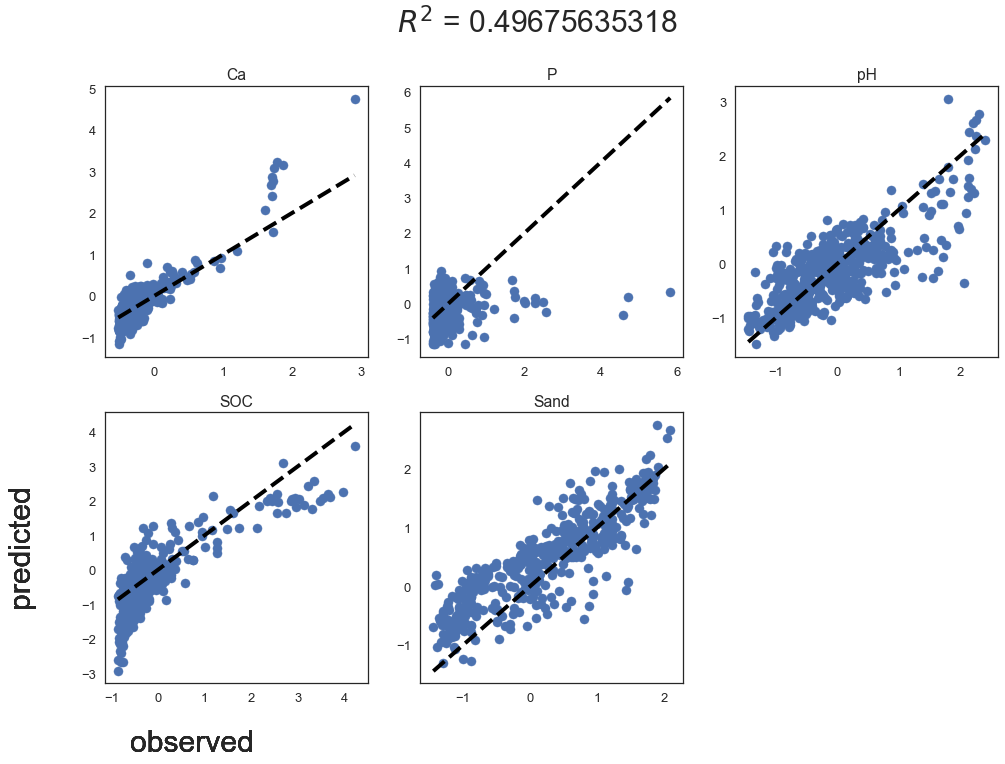

In [89]:
ELEV_train,ELEV_test=PCA_linReg(spectral_data,targets,satellite,"ELEV",0,20)

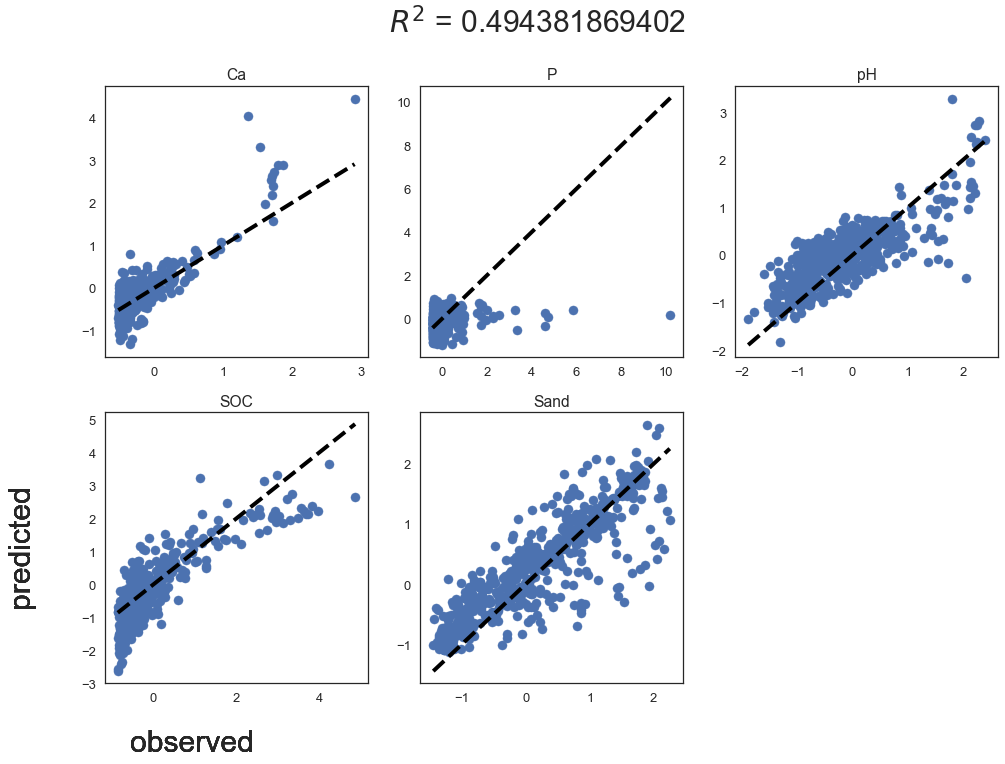

In [81]:
LSTN_train,LSTN_test=PCA_linReg(spectral_data,targets,satellite,"LSTN",0,20)

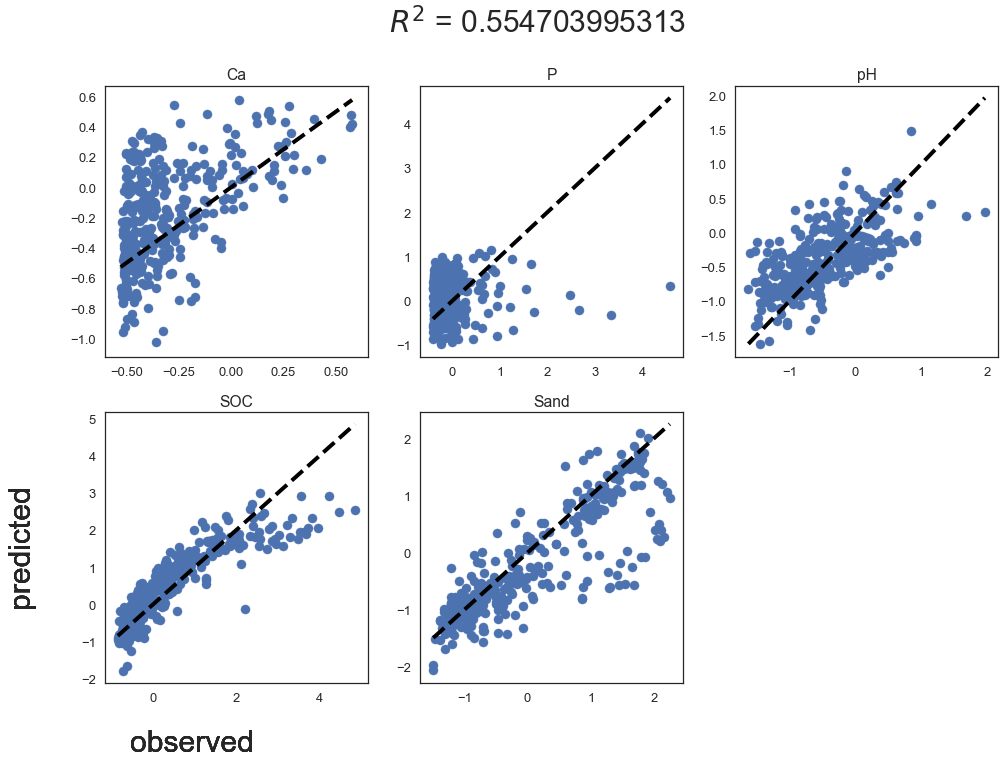

In [82]:
EVI_train,EVI_test=PCA_linReg(spectral_data,targets,satellite,"EVI",1,20)

### Here's a summary of how well the models performed for these three splits, compared to the best linear model:

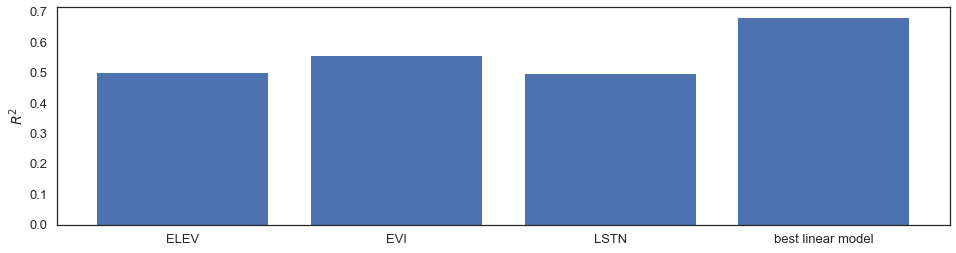

In [96]:
dataPlot=[ELEV_test,EVI_test,LSTN_test,0.68]
plt.figure(figsize=(16,4))
plt.bar([0,1,2,3],dataPlot,tick_label=["ELEV","EVI","LSTN","best linear model"])
plt.ylabel(r"$R^2$")

#### It looks like the variation in climate across the test sample could potentially affect the predictions, but maybe not that much.

It's also possible we could do better on the first three models, since they weren't cross-validated (like the best linear model)

In [66]:
to_keep_schedule = [1,2,3,5,
                    10,20,30,50,
                    100,200,300,500,
                    615
                   ]
compressive_PCAs = []

for to_keep in to_keep_schedule:
    compressive_PCAs.append(sklearn.decomposition.PCA(n_components=to_keep).fit(X_train))    

In [67]:


model = sklearn.linear_model.LinearRegression()



train_scores = []
test_scores = []

for compressive_PCA in compressive_PCAs:
    
    transformed_X_train = compressive_PCA.transform(X_train)
    transformed_X_test =  compressive_PCA.transform(X_test)
    
    model.fit(transformed_X_train,y_train)
    train_score = model.score(transformed_X_train,y_train)
    test_score = model.score(transformed_X_test,y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

the best number of dimensions to keep is: 20


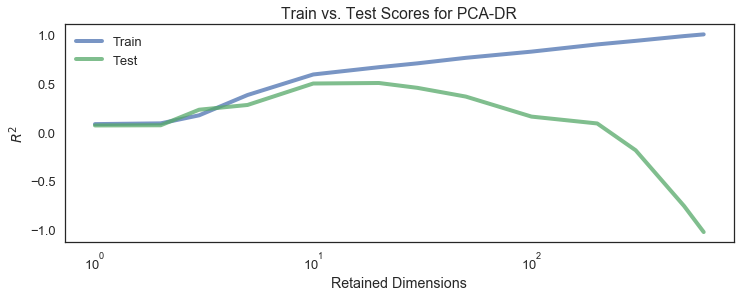

In [68]:
plt.figure(figsize=(12,4))
plt.semilogx(to_keep_schedule,train_scores,
         linewidth=4,alpha=0.75,
         label='Train')
plt.semilogx(to_keep_schedule,test_scores,
         linewidth=4,alpha=0.75,
         label='Test');
plt.xlabel("Retained Dimensions");
plt.ylabel("$R^2$")
plt.legend(); plt.title("Train vs. Test Scores for PCA-DR");

best_score_index = np.argmax(test_scores)
best_score = train_scores[best_score_index]
best_score_num_dimensions = to_keep_schedule[best_score_index]
print("the best number of dimensions to keep is: "+ str(best_score_num_dimensions))

### Does depth of the soil sample (topsoil vs. subsoil) predict the targets?

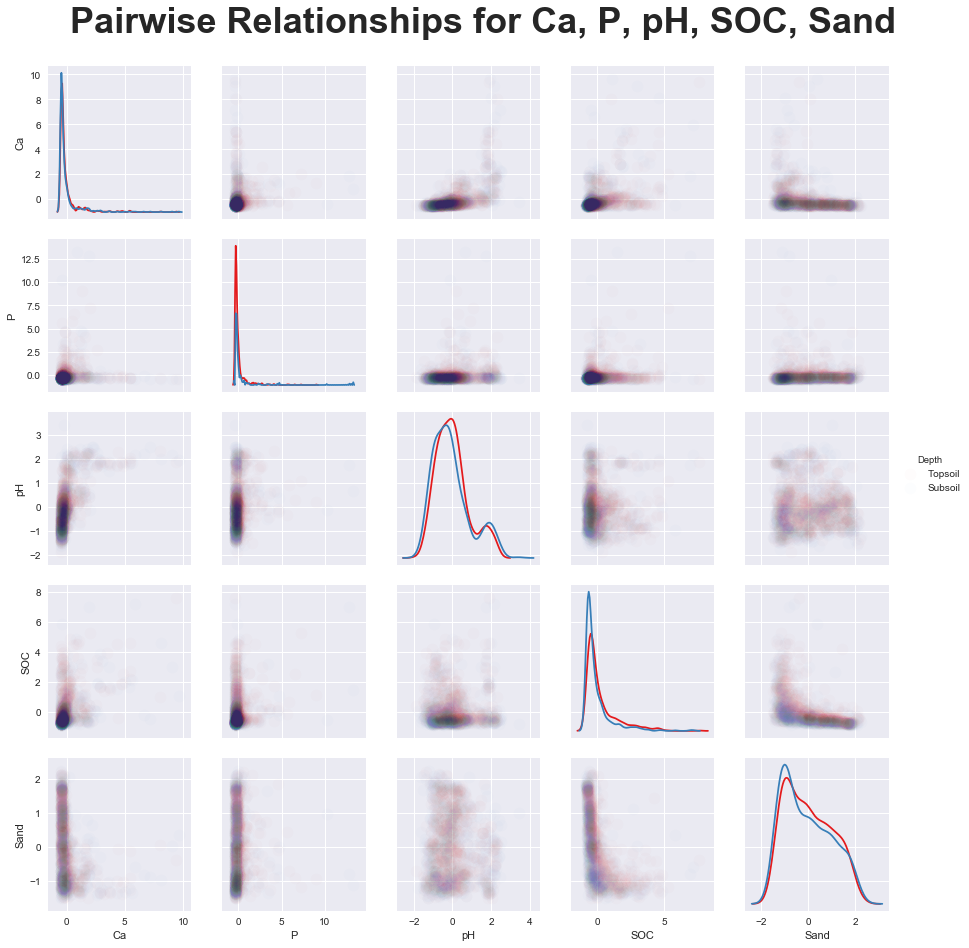

In [9]:
sns.pairplot(data=data,
                vars=output_variables,
             hue="Depth",
             palette='Set1',
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(output_variables),
            fontsize=36,fontweight='bold',y=1.05
            );

In [14]:
top_spectra_dataframe = data_top[data_columns]
sub_spectra_dataframe=data_sub[data_columns]

In [15]:
stats_top = top_spectra_dataframe.describe()
stats_sub = sub_spectra_dataframe.describe()



In [17]:
average_values_top = stats_top.loc['mean'].as_matrix()
sds_top = stats_top.loc['std'].as_matrix()

average_values_sub = stats_sub.loc['mean'].as_matrix()
sds_sub = stats_sub.loc['std'].as_matrix()

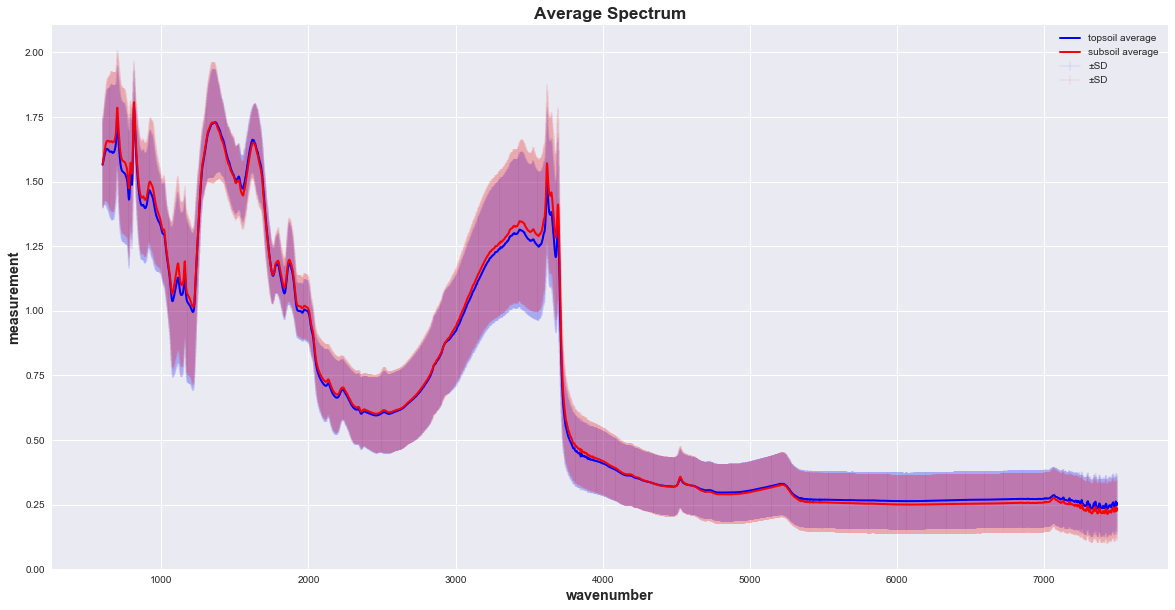

In [21]:
plt.figure(figsize=(20,10))

plt.errorbar(x=wavenumbers,y=average_values_top,yerr=sds_top,
            errorevery=1,ecolor='b',color='b',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_top,color='b',
         linewidth=2,zorder=1,label='topsoil average'
        );

plt.errorbar(x=wavenumbers,y=average_values_sub,yerr=sds_sub,
            errorevery=1,ecolor='r',color='r',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_sub,color='r',
         linewidth=2,zorder=1,label='subsoil average'
        );

plt.legend()
plt.title('Average Spectrum', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');